# Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data in

In [1]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [5]:
df = pd.read_csv(path)

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [11]:
# summarize the data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.

In [14]:
cdf = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


We can plot each of these features:

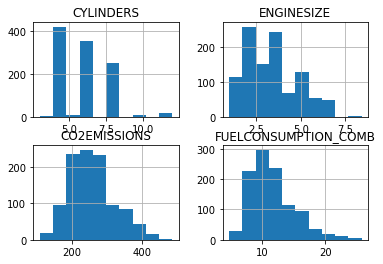

<Figure size 720x360 with 0 Axes>

In [18]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

viz.hist()

plt.figure(figsize=(10, 5))
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

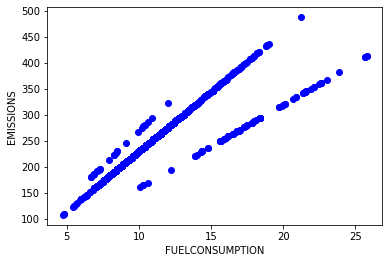

In [20]:
# FUELCONSUMPTION_COMB vs. CO2EMISSIONS

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')

plt.xlabel('FUELCONSUMPTION')
plt.ylabel('EMISSIONS')
plt.show()

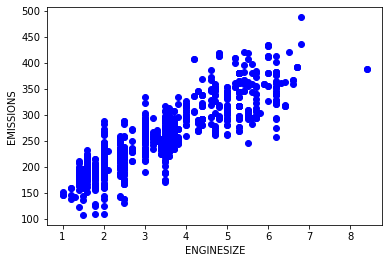

In [22]:
# ENGINESIZE vs. CO2EMISSIONS

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
    
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.show()

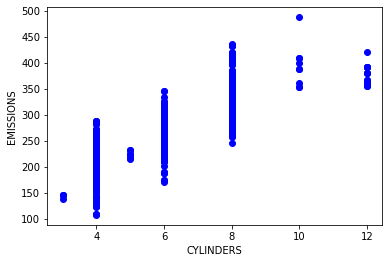

In [23]:
# CYLINDERS vs. CO2EMISSIONS

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
    
plt.xlabel('CYLINDERS')
plt.ylabel('EMISSIONS')
plt.show()

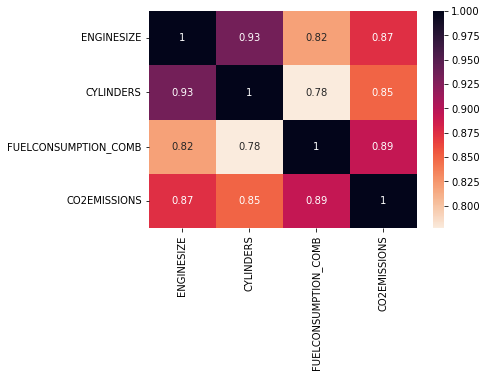

In [27]:
cmap = sns.cm.rocket_r

sns.heatmap(cdf.corr(), annot=True, cmap=cmap)

plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [38]:
# len(df) 는 1067 개 인데, 0과 1사이의 1067 개의 난수를 만들어서 0.8 보다 작은 것들은 True, 그렇지 않은 것들은 False 로 할당하고 True 에 걸리는 애들은 Train data 로 가져온 것임..

msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True,  True, ...,  True,  True,  True])

In [39]:
train = cdf[msk]
test = cdf[~msk]

In [40]:
print(len(train), len(test))

862 205


In [41]:
train.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
5,3.5,6,10.0,230


### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution

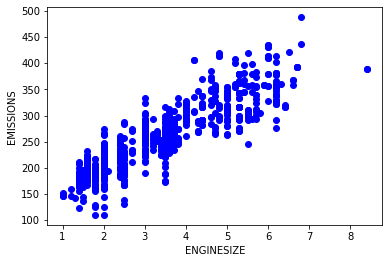

In [44]:
# scatterplot of train data

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.show()

#### Modeling

Using sklearn package to model data.


In [49]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']]) # np.asanyarray 는 리스트, 튜플 등을 array 배열로 바꿔주는 함수
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y) # train 데이터를 넣어서 모델을 훈련시켜 줌


LinearRegression()

In [50]:
# coefficients 와 intercept 를 추출

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.21059166]]
Intercept:  [125.18978912]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs

We can plot the fit line over the data:

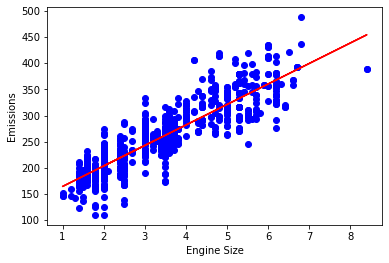

In [66]:
# plot outputs (train_x, train_y)

plt.scatter(train_x, train_y, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') # 여기에 [0][0] 하는 이유... 밑에 셀 봐보기
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [58]:
regr.coef_[0][0]

39.21059165586312

In [61]:
regr.intercept_[0]

125.18978912214462

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [67]:
test.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
4,3.5,6,10.6,244
16,4.7,8,14.7,338
25,2.0,4,10.2,235
28,3.0,6,11.2,258
32,3.0,6,8.4,227


In [68]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']]) # np.asanyarray 는 리스트, 튜플 등을 array 배열로 바꿔주는 함수
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x) # test_x 값을 모델에 넣어서 넣은 y_hat 을 보고자 함

In [73]:
# MAE (Mean Absolute Error)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))

Mean absolute error: 24.92


In [74]:
# MSE (Mean Square Error)

print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))

Residual sum of squares (MSE): 1071.36


In [75]:
# r2_score

print("R2-score: %.2f" % r2_score(test_y, test_y_) )

R2-score: 0.70


## Exercise

Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe

In [78]:
train.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
5,3.5,6,10.0,230


In [81]:
# Build Models

lr = linear_model.LinearRegression()

train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])

lr.fit(train_x2, train_y2)

LinearRegression()

In [83]:
# predicted y value (yhat) using 'predict function'

test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])

predictions = lr.predict(test_x2) # predict 함수로 predicted value 구해보기
predictions

array([[240.47291741],
       [305.83577886],
       [234.09605287],
       [250.0382142 ],
       [205.40016248],
       [250.0382142 ],
       [250.0382142 ],
       [304.24156273],
       [355.25647898],
       [253.22664647],
       [265.98037553],
       [216.55967541],
       [235.69026901],
       [334.53166925],
       [210.18281088],
       [230.90762061],
       [210.18281088],
       [224.53075608],
       [230.90762061],
       [235.69026901],
       [211.77702701],
       [197.42908181],
       [232.50183674],
       [273.9514562 ],
       [305.83577886],
       [210.18281088],
       [264.3861594 ],
       [246.84978194],
       [206.99437861],
       [320.18372406],
       [229.31340447],
       [251.63243034],
       [336.12588539],
       [305.83577886],
       [250.0382142 ],
       [275.54567233],
       [250.0382142 ],
       [194.24064955],
       [262.79194327],
       [329.74902085],
       [312.21264339],
       [414.2424759 ],
       [334.53166925],
       [361

In [84]:
# Getting Intercept and coefficient

print("Intercept is: ", lr.intercept_)
print("Coefficient is: ", lr.coef_)

Intercept is:  [71.48600731]
Coefficient is:  [[15.94216133]]


In [85]:
# predicted y value (yhat)
# predict 함수 안쓰고, intercept 및 slope 로 formala 를 만들어서 구해보기

predictions2 = lr.intercept_[0] + lr.coef_[0][0]*test_x2
predictions2

array([[240.47291741],
       [305.83577886],
       [234.09605287],
       [250.0382142 ],
       [205.40016248],
       [250.0382142 ],
       [250.0382142 ],
       [304.24156273],
       [355.25647898],
       [253.22664647],
       [265.98037553],
       [216.55967541],
       [235.69026901],
       [334.53166925],
       [210.18281088],
       [230.90762061],
       [210.18281088],
       [224.53075608],
       [230.90762061],
       [235.69026901],
       [211.77702701],
       [197.42908181],
       [232.50183674],
       [273.9514562 ],
       [305.83577886],
       [210.18281088],
       [264.3861594 ],
       [246.84978194],
       [206.99437861],
       [320.18372406],
       [229.31340447],
       [251.63243034],
       [336.12588539],
       [305.83577886],
       [250.0382142 ],
       [275.54567233],
       [250.0382142 ],
       [194.24064955],
       [262.79194327],
       [329.74902085],
       [312.21264339],
       [414.2424759 ],
       [334.53166925],
       [361

In [88]:
# Mean Absolute Error 구해보기

print("Mean Absolute Error is: %.2f" % np.mean(np.absolute(predictions - test_y2)))

Mean Absolute Error is: 18.57
